# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [94]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [95]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | yaren
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | port augusta
Processing Record 6 of Set 1 | saipan
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | fort bragg
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | belyayevka
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | quellon
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | borogontsy
Processing Record 21 of Set 1 | vilyuchinsk
Processing Record 22 of Set 1 | p

In [96]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [97]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,18.83,66,95,8.71,PN,1721591585
1,yaren,-0.5472,166.9160,29.12,75,7,7.89,NR,1721591585
2,port-aux-francais,-49.3500,70.2167,3.99,97,100,10.47,TF,1721591585
3,waitangi,-43.9535,-176.5597,9.90,99,100,4.47,NZ,1721591585
4,port augusta,-32.5000,137.7667,8.31,50,0,3.60,AU,1721591585


In [98]:
import os

# Create a DataFrame from the city data list
city_data_df = pd.DataFrame(city_data)

# Create the output directory if it does not exist
output_dir = "output_data"
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame to a CSV file, including the index
output_path = os.path.join(output_dir, "cities.csv")
city_data_df.to_csv(output_path, index=True)

# Optionally, display a sample of the data
print(city_data_df.head())

                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          adamstown -25.0660 -130.1015     18.83        66          95   
1              yaren  -0.5472  166.9160     29.12        75           7   
2  port-aux-francais -49.3500   70.2167      3.99        97         100   
3           waitangi -43.9535 -176.5597      9.90        99         100   
4       port augusta -32.5000  137.7667      8.31        50           0   

   Wind Speed Country        Date  
0        8.71      PN  1721591585  
1        7.89      NR  1721591585  
2       10.47      TF  1721591585  
3        4.47      NZ  1721591585  
4        3.60      AU  1721591585  


In [99]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,18.83,66,95,8.71,PN,1721591585
1,yaren,-0.5472,166.9160,29.12,75,7,7.89,NR,1721591585
2,port-aux-francais,-49.3500,70.2167,3.99,97,100,10.47,TF,1721591585
3,waitangi,-43.9535,-176.5597,9.90,99,100,4.47,NZ,1721591585
4,port augusta,-32.5000,137.7667,8.31,50,0,3.60,AU,1721591585


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

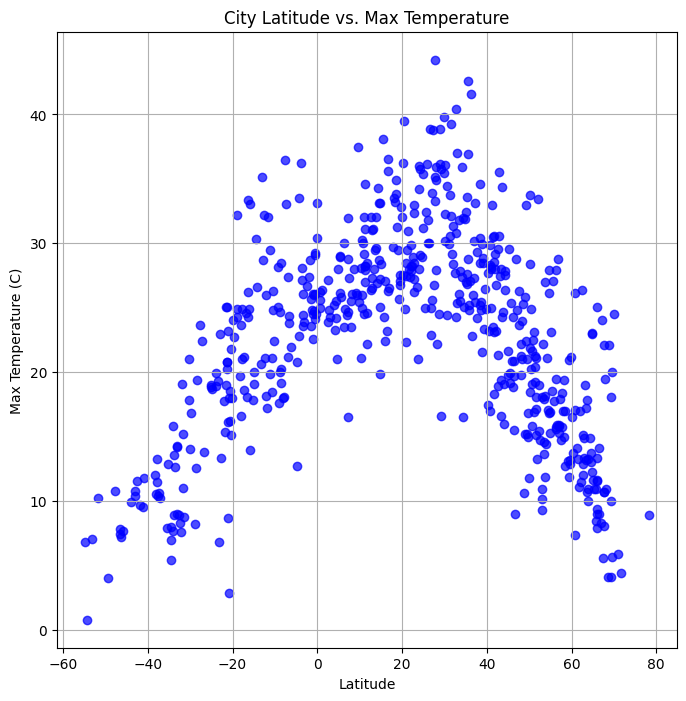

In [100]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,8))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='b', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

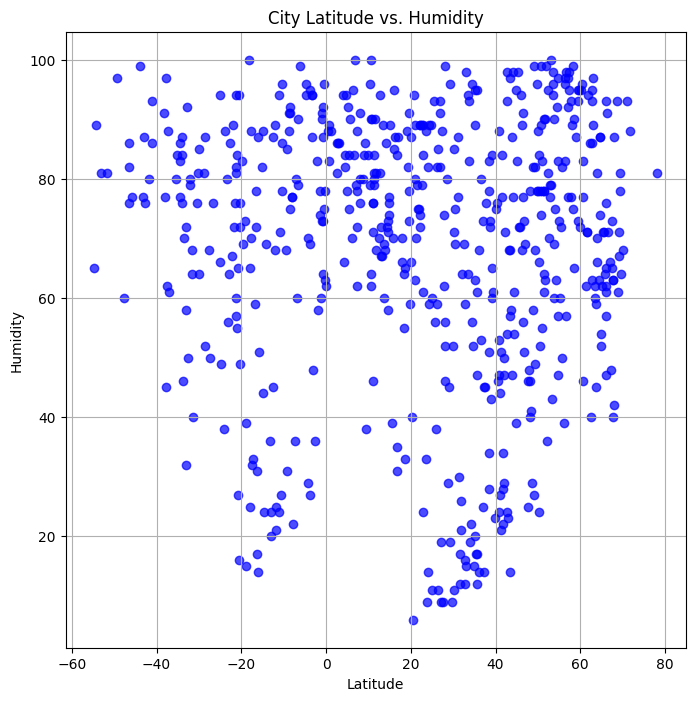

In [101]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,8))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='b', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

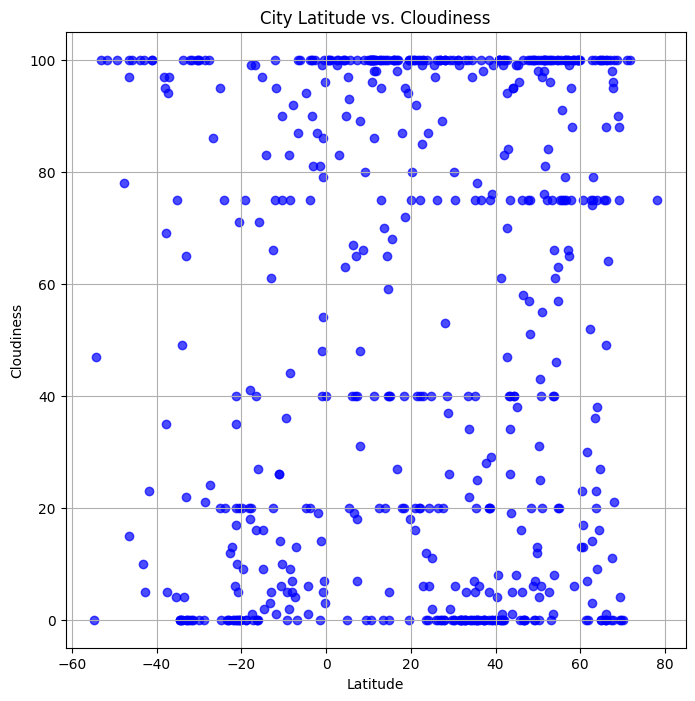

In [102]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,8))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='b', alpha=0.7)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

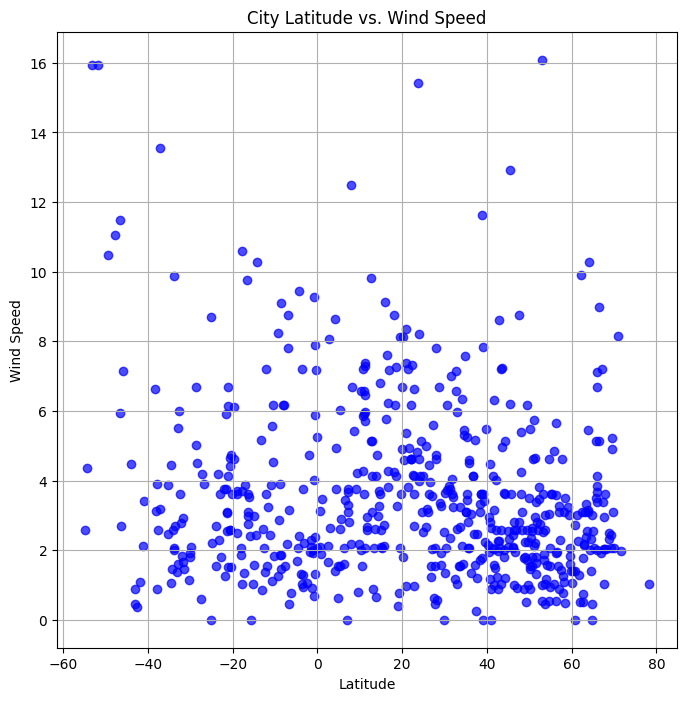

In [103]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,8))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='b', alpha=0.7)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [104]:
# Define a function to create Linear Regression plots
def plt_lin_reg(x_values, y_values, titles, position, title="Linear Regression Plot"):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression = x_values * slope + intercept

    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression, color='red')
    plt.annotate(line_eq, position, fontsize=14, color='red')
    plt.grid(True)
    plt.xlabel("Latitude")
    plt.ylabel(titles)
    plt.title(title)
    
    print(f"The r-value is: {rvalue}")
    plt.show()


In [105]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,saipan,15.1355,145.7010,28.39,89,40,2.06,MP,1721591301
7,fort bragg,35.1390,-79.0060,32.47,63,40,3.09,US,1721591586
8,yellowknife,62.4560,-114.3525,26.34,40,75,3.09,CA,1721591586
9,belyayevka,51.3974,56.4096,21.29,78,100,4.65,RU,1721591586
14,albany,42.6001,-73.9662,29.57,54,94,0.89,US,1721591543


In [106]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,18.83,66,95,8.71,PN,1721591585
1,yaren,-0.5472,166.9160,29.12,75,7,7.89,NR,1721591585
2,port-aux-francais,-49.3500,70.2167,3.99,97,100,10.47,TF,1721591585
3,waitangi,-43.9535,-176.5597,9.90,99,100,4.47,NZ,1721591585
4,port augusta,-32.5000,137.7667,8.31,50,0,3.60,AU,1721591585


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6509446870191924


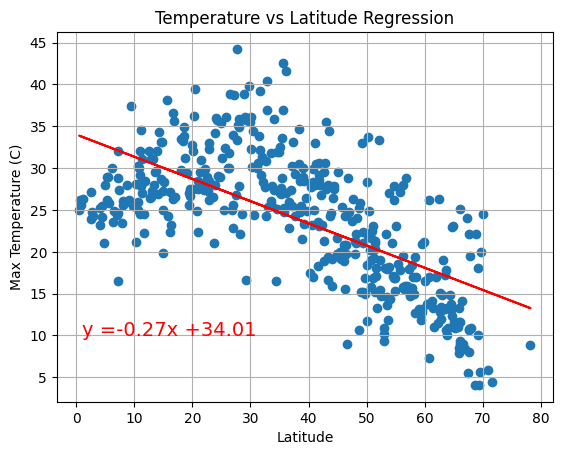

In [107]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt_lin_reg(x_values, y_values, "Max Temperature (C)", (1, 10), "Temperature vs Latitude Regression")

The r-value is: 0.7876515001976625


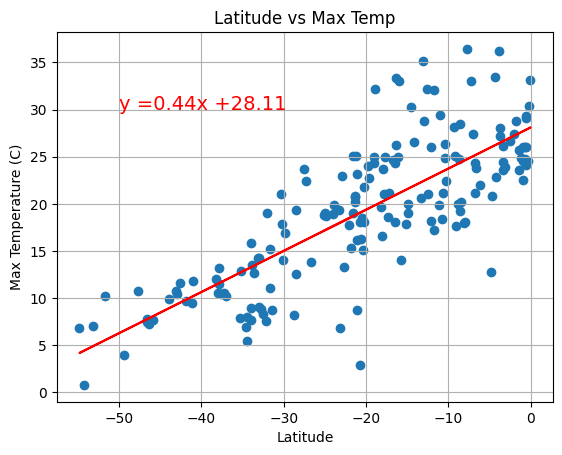

In [108]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt_lin_reg(x_values, y_values, "Max Temperature (C)", (-50, 30), "Latitude vs Max Temp")

**Discussion about the linear relationship:** The data sets containing cities in both the Northern and Southern hemispheres show strong coorelation between latitude and maximum temperature. Each data set shows a temperature increase when the city is closer the the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.011018877996089343


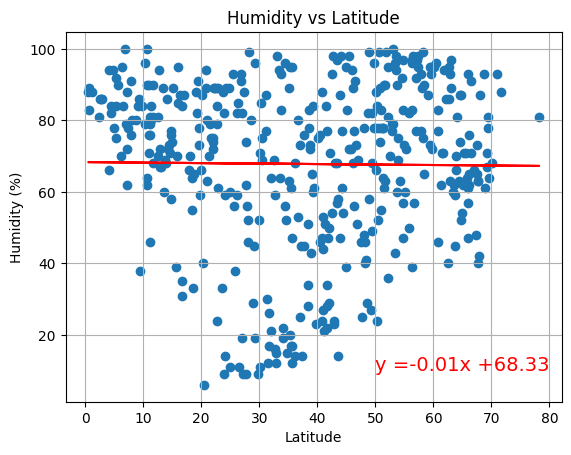

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt_lin_reg(x_values, y_values, "Humidity (%)", (50, 10), "Humidity vs Latitude")

The r-value is: -0.1253466329672992


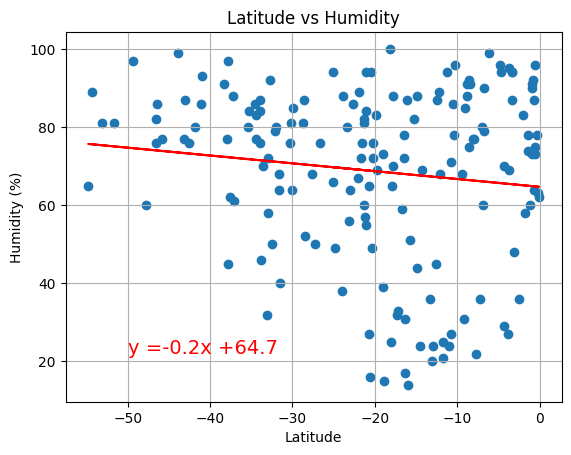

In [110]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt_lin_reg(x_values, y_values, "Humidity (%)", (-50,22), "Latitude vs Humidity")

**Discussion about the linear relationship:** Neither of the data sets showed a correlation between humidity and latitude. The city's humidity percentage did not change based on the latitude location.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.09497961734560964


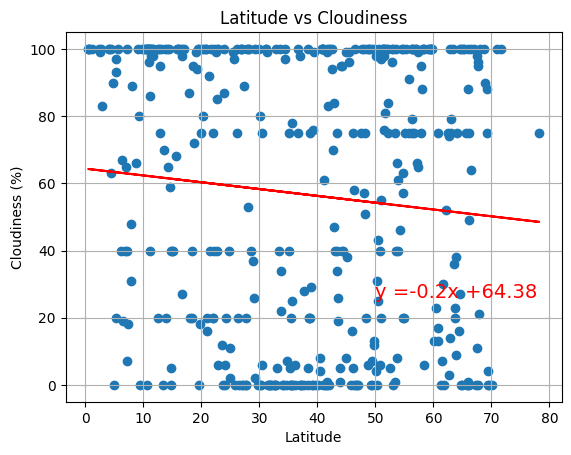

In [111]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt_lin_reg(x_values, y_values, "Cloudiness (%)", (50,26), "Latitude vs Cloudiness")

The r-value is: -0.059261687564022156


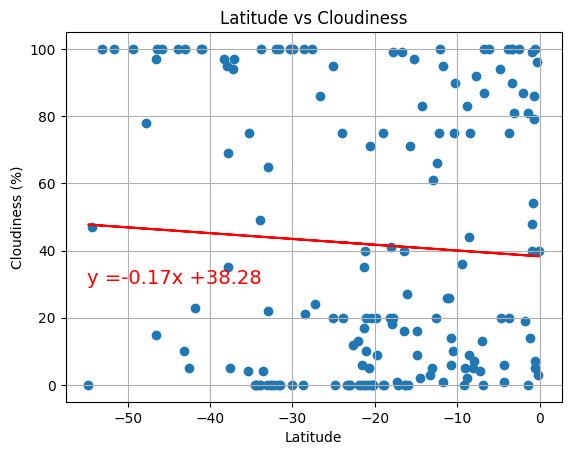

In [112]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt_lin_reg(x_values, y_values, "Cloudiness (%)", (-55,30), "Latitude vs Cloudiness")

**Discussion about the linear relationship:** Neither the Southern or the Northern hemosphere showed a correlation between latitude and cloudiness percentage.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.20790692849595352


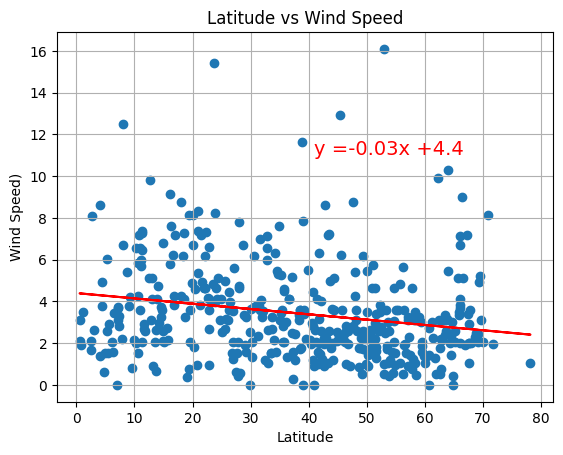

In [113]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt_lin_reg(x_values, y_values, "Wind Speed)", (41,11), "Latitude vs Wind Speed")

The r-value is: -0.1889545025753705


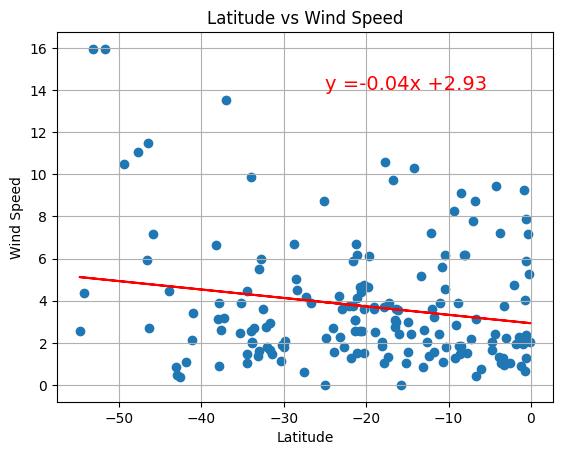

In [114]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt_lin_reg(x_values, y_values, "Wind Speed", (-25,14), "Latitude vs Wind Speed")

**Discussion about the linear relationship:** Neither the Southern or Northern hemospheres showed a coorelation between that latitude location of a city and the wind speed of that city.